# Final Data Science Report for Capstone One

## Introduction
An explorative analysis on the country and states in the US affected by the Deferred Action for Childhood Arrivals (DACA). To study and analyze the impact of DACA and recent trends as per the last four quarters in 2017.

### 1. Data Cleaning
-------------------

##### How data is collected?
Data was collected from the USCIS link for the 2017 and 2016.
https://www.uscis.gov/tools/reports-studies/immigration-forms-data/data-set-form-i-821d-deferred-action-childhood-arrivals

All data was converted from PDF to excel data using the tool from https://www.pdftoexcel.com/

Data will be divided into four parts – Case status, Country Status, States Status and 2017 Status

Common Problems Found in Datasets
Inconsistent column names
Missing Data
Outliners
Duplicate rows
Untidy
Need to process columns
Column type signal unexpected data values
Let’s go over each problem and what I did to wrangle the data.



##### Inconsistent column names
Downloaded the pdf from the USCIS site and convert that into excel sheet using an online tool. Now the headings are inconsistent with title case, uppercase and some space. Load the data into pandas and checked how inconsistent the column headers using columns(). All examples shown below.

In [1]:
#Declaring all libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import scipy.stats as stats
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statsmodels.stats.api as sms
from scipy import stats as st
import pandas.tseries
#To scale our features as with linear regression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.ticker as mtick
from sklearn.metrics import confusion_matrix

/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_excel('data/2017-status.xls',header=1)
df.columns

Index(['Quarter', 'Type', 'Accepted', 'Rejected', 'Received', 'Average',
       'Approved', 'Denied', 'Pending'],
      dtype='object')

In [3]:
df = pd.read_excel('data/case-status.xls',header=1)
df.columns

Index(['Year', 'Type', 'Accepted', 'Rejected', 'Received', 'Average',
       'Biometrics', 'Review', 'Approved', 'Denied', 'Pending', 'Target'],
      dtype='object')

In [4]:
df = pd.read_excel('data/country-status.xls',header=1)
df.columns

Index(['Country', 'Initials-Accepted', 'Initials-Approved',
       'Renewals-Accepted', 'Renewals-Approved', 'Total-Accepted',
       'Total-Approved'],
      dtype='object')

In [5]:
df = pd.read_excel('data/us-states-summary.xls',header=1)
df.columns

Index(['State', 'Initials-Accepted', 'Initials-Approved', 'Renewals-Accepted',
       'Renewals-Approved', 'Total-Accepted', 'Total-Approved'],
      dtype='object')

##### Missing data
Using shape() functionality checked the states summary to see whether any data is missing. As you see below the number of states returned is 61 with 7 columns. On investigating further found out there was some null rows, one row with state name as ‘missing’ and few other rows with values which are not states of US but considered as region.

In [6]:
df.shape

(61, 7)

|![image](https://raw.githubusercontent.com/sunilayyaps/datascience/master/capstone-project1/DataCleaning/images/Picture1.png)|![image](https://raw.githubusercontent.com/sunilayyaps/datascience/master/capstone-project1/DataCleaning/images/Picture2.png)|![image](https://raw.githubusercontent.com/sunilayyaps/datascience/master/capstone-project1/DataCleaning/images/Picture3.png)|
|------|------|
|     | |

### Checking data types for all data
Using info() to get additional information about each dataset. On examining the results found that case-status datasets has total of 10 rows but column Biometrics scheduled and request under review had only 2 values. So there were 8 missing values. Also in the same data sets noticed that these two columns are of datatype float64 and Denied column is object data type which will be treated like string. Denied column should have been int64 datatype.


In [7]:
df = pd.read_excel('data/2017-status.xls',header=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
Quarter     8 non-null object
Type        8 non-null object
Accepted    8 non-null int64
Rejected    8 non-null int64
Received    8 non-null int64
Average     8 non-null int64
Approved    8 non-null int64
Denied      8 non-null int64
Pending     8 non-null int64
dtypes: int64(7), object(2)
memory usage: 656.0+ bytes
None


In [8]:
df = pd.read_excel('data/case-status.xls',header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
Year          10 non-null int64
Type          10 non-null object
Accepted      10 non-null int64
Rejected      10 non-null int64
Received      10 non-null int64
Average       10 non-null int64
Biometrics    2 non-null float64
Review        2 non-null float64
Approved      10 non-null int64
Denied        10 non-null int64
Pending       10 non-null int64
Target        10 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 1.0+ KB


In [9]:
df = pd.read_excel('data/country-status.xls',header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
Country              25 non-null object
Initials-Accepted    25 non-null int64
Initials-Approved    25 non-null int64
Renewals-Accepted    25 non-null int64
Renewals-Approved    25 non-null int64
Total-Accepted       25 non-null int64
Total-Approved       25 non-null int64
dtypes: int64(6), object(1)
memory usage: 1.4+ KB


In [10]:
df = pd.read_excel('data/us-states-summary.xls',header=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
State                61 non-null object
Initials-Accepted    61 non-null int64
Initials-Approved    61 non-null int64
Renewals-Accepted    61 non-null int64
Renewals-Approved    61 non-null int64
Total-Accepted       61 non-null int64
Total-Approved       61 non-null int64
dtypes: int64(6), object(1)
memory usage: 3.4+ KB


### Detect Outliers using Data visualization
Using histogram checked the number of approved case status for all the cases and the number does look fine. 


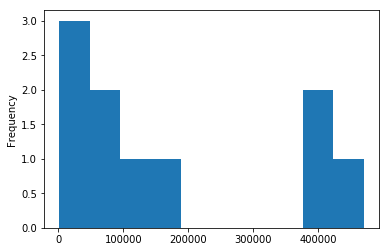

In [11]:
df = pd.read_excel('data/case-status.xls',header=1)
df.Approved.plot('hist')
plt.show()

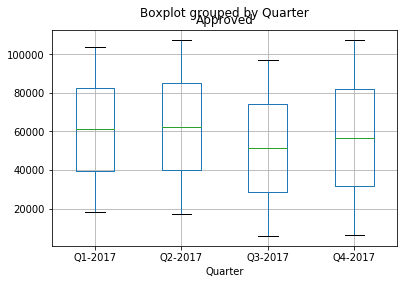

In [12]:
df = pd.read_excel('data/2017-status.xls',header=1)
df.boxplot(column='Approved',by='Quarter')
plt.show()

### PIVOT: UN-MELTING DATA
The raw data provided by the USCIS website was not normalized. So, I had to normalize the data while converting it into excel. This was done prior to importing the dataset in python. But I had to pivot the data to group by year to convert the data from Analysis friendly shape to reporting friendly shape.

In [13]:
df = pd.read_excel('data/2017-status.xls',header=1)
daca_tidy= df.pivot(index='Quarter',columns ='Type',values='Approved')
print(daca_tidy)

Type     Initial   Renewal
Quarter                   
Q1-2017     18239   103680
Q2-2017     17220   107480
Q3-2017      5827    96682
Q4-2017      6159   107426


*******************************************************************************************************************

### 2.  DACA STORY
------------------------------
DACA was an executive action taken by President Barack Obama that allowed undocumented immigrants who came to the US under the age of 16 to apply for protection from deportation. After a background check, those individuals were able to get renewable two-year permits to work and study in the US, as well.

Since it went into effect in 2012, roughly 800,000 people were protected by the program, and roughly 700,000 had active DACA protections in September when the Trump administration announced its end.

#### Interesting Fact
Since its inception in 2012, the renewal cases has exceeded the initial application cases from the year 2015 which means more renewal are happening than fresh application for a two year permit 

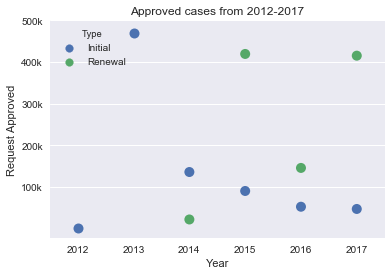

In [14]:
sns.set()
df = pd.read_excel('data/case-status.xls',header=1)

# Plot a swarmplot for request approved from 2012-2017
sns.swarmplot(x='Year', y='Approved', data=df,hue='Type',size=10)
plt.ylabel('Request Approved')
plt.title("Approved cases from 2012-2017")
tick_val = [100000,200000,300000,400000,500000]
tick_lab = ['100k','200k','300k','400k','500k']
plt.yticks(tick_val,tick_lab)

# Display the plot
plt.show()



#### Trends in Rejection
Since its inception, the trend in rejection for initial application has gone down as shown in red. Contrary to that, the rejection of renewal application has gone up as shown in blue. In 2017 alone 43,387 renewal applications were rejected marking it as the highest of all time. Note that this is rejection of application where the case was not even accepted. 

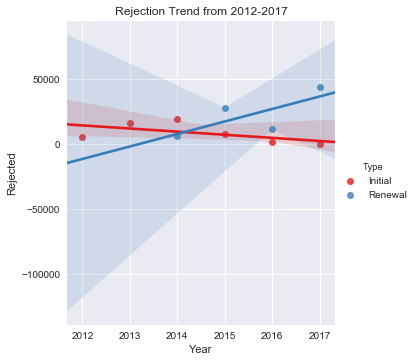

In [15]:
sns.set
df = pd.read_excel('data/case-status.xls',header=1)
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x='Year', y='Rejected', data=df, hue='Type', palette='Set1')
# Display the plot
plt.title('Rejection Trend from 2012-2017')
plt.show()

#### APPROVAL/DENIAL USING BAR PLOT
If you notice the trend in the number of the petition being approved there is a drop every alternate year like 2014 and 2016. For Denials even though the trend is going down, it's not the real picture as the applications are getting rejected during acceptance phase

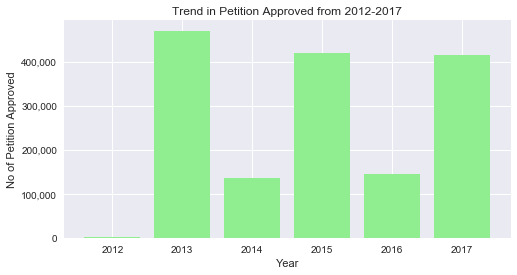

In [16]:
sns.set
df = pd.read_excel('data/case-status.xls',header=1)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

plt.bar(df['Year'],df['Approved'],color='lightgreen')
plt.xlabel('Year')
plt.ylabel('No of Petition Approved')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.title('Trend in Petition Approved from 2012-2017')
plt.show()

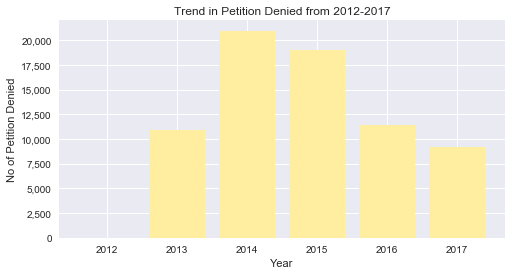

In [17]:
df = pd.read_excel('data/case-status.xls',header=1)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
plt.bar(df['Year'],df['Denied'],color='#ffeda0')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.xlabel('Year')
plt.ylabel('No of Petition Denied')
plt.title('Trend in Petition Denied from 2012-2017')
plt.show()

#### COMPARING LAST 3 YEARS TREND
The first graph indicates applications have been accepted and rejected in the initial phase.

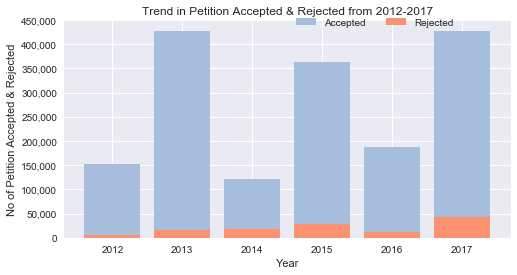

In [18]:
df = pd.read_excel('data/case-status.xls',header=1)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.bar(df['Year'],df['Accepted'],color='#a6bddb',label='Accepted')
plt.bar(df['Year'],df['Rejected'],color='#fc9272',label='Rejected')
plt.xlabel('Year')
ax.yaxis.set_major_formatter(tick)
plt.ylabel('No of Petition Accepted & Rejected')
plt.title('Trend in Petition Accepted & Rejected from 2012-2017')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

Below graph indicates the trend in approval and denial over the years. 

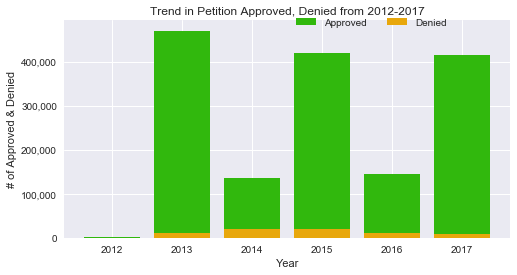

In [19]:
df = pd.read_excel('data/case-status.xls',header=1)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.bar(df['Year'],df['Approved'],color='#31B80D',label='Approved')
plt.bar(df['Year'],df['Denied'],color='#E8A70C',label='Denied')
plt.xlabel('Year')
plt.ylabel('# of Approved & Denied')
plt.title('Trend in Petition Approved, Denied from 2012-2017')
ax.yaxis.set_major_formatter(tick)
plt.legend(loc='upper left', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

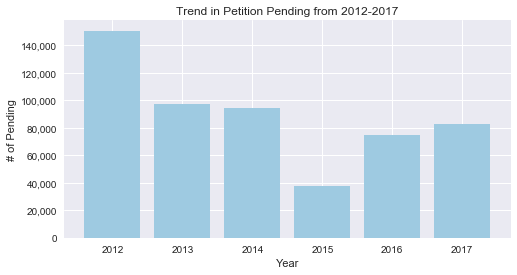

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
plt.bar(df['Year'],df['Pending'],color='#9ecae1')
plt.xlabel('Year')
plt.ylabel('# of Pending')
plt.title('Trend in Petition Pending from 2012-2017')
ax.yaxis.set_major_formatter(tick)
plt.show()

#### Exploring further
We calculated the percentage of approval, denial and pending for each year as per the type and we plotted couple of graphs for Initial and Renewal applications.


In [21]:
for lab, row in df.iterrows() :
    df['Total_Processed']  = df['Approved'] + df['Denied'] + df ['Pending']
    df["Approved_Percentage"] = round(df["Approved"]/df['Total_Processed'] * 100,1)
    df["Denied_Percentage"] = round(df["Rejected"]/df['Total_Processed']  * 100,1)
    df["Pending_Percentage"] = round(df["Pending"]/df['Total_Processed']  * 100,1)
df
df_subset = df1 = df[['Year','Type','Accepted','Approved','Denied','Pending','Total_Processed','Approved_Percentage','Denied_Percentage','Pending_Percentage']]
print(df_subset)

   Year     Type  Accepted  Approved  Denied  Pending  Total_Processed  \
0  2012  Initial    152431      1680       0   150751           152431   
1  2013  Initial    427616    470352   10975    97040           578367   
2  2014  Initial    122424    136101   20989    62374           219464   
3  2014  Renewal    116476     22235       0    94238           116473   
4  2015  Initial     85303     90613   19070    37994           147677   
5  2015  Renewal    363553    419394    2285    36112           457791   
6  2016  Initial     73362     52789   11398    47169           111356   
7  2016  Renewal    187339    145913    3029    74509           223451   
8  2017  Initial     45557     47445    9248    36033            92726   
9  2017  Renewal    427316    415268    3945    82612           501825   

   Approved_Percentage  Denied_Percentage  Pending_Percentage  
0                  1.1                3.5                98.9  
1                 81.3                2.8                

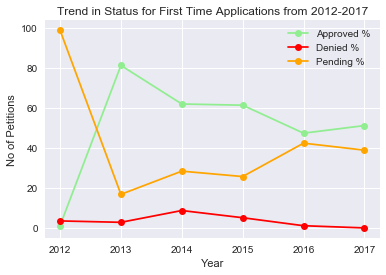

In [22]:
df_initial  = df_subset.loc[df_subset['Type'] == 'Initial']
plt.plot(df_initial['Year'],df_initial['Approved_Percentage'],color='lightgreen',label='Approved %',marker='o')
plt.plot(df_initial['Year'],df_initial['Denied_Percentage'],color='red',label='Denied %',marker='o')
plt.plot(df_initial['Year'],df_initial['Pending_Percentage'],color='orange',label='Pending %',marker='o')
plt.title('Trend in Status for First Time Applications from 2012-2017')
plt.xlabel('Year')
plt.ylabel('No of Petitions')
plt.legend(loc='upper right')
plt.show()

The trend for approved applications has gone down over the years but combined with renewal application it is consistent over the years. The number of denials has stayed flat through out apart from a little spike in 2014. 

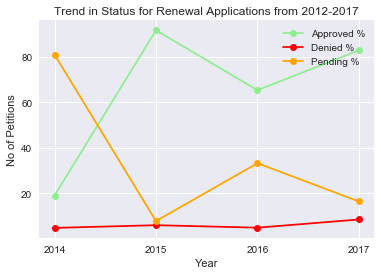

In [23]:
sns.set_style("darkgrid")
df_renewal  = df_subset.loc[df_subset['Type'] == 'Renewal']
plt.plot(df_renewal['Year'],df_renewal['Approved_Percentage'],color='lightgreen',label='Approved %',marker='o')
plt.plot(df_renewal['Year'],df_renewal['Denied_Percentage'],color='red',label='Denied %',marker='o')
plt.plot(df_renewal['Year'],df_renewal['Pending_Percentage'],color='orange',label='Pending %',marker='o')
plt.title('Trend in Status for Renewal Applications from 2012-2017')
plt.xlabel('Year')
plt.ylabel('No of Petitions')
plt.legend(loc='upper right')
tick_val = [2014,2015,2016,2017]
tick_lab = ['2014','2015','2016','2017']
plt.xticks(tick_val,tick_lab)
plt.show()

The above chart demonstrates that every two years USCIS gets more renewal applications. So it was obvious to see a spike in the approval rate in 2015 because of the number of renewal applications received in 2014. Additionaly there is a spike in denials in year 2017 but it's only limited to 8.5%. 

#### TOP 5 COUNTRY & US STATE
Below graph shows the top 5 countries benefited by DACA act and the top 5 US state where the applications were approved. The below two charts indicates how Mexico is benefited by DACA and the vast difference in the number of approvals which Mexico has got compared to El-Salvador or Gautamala. 

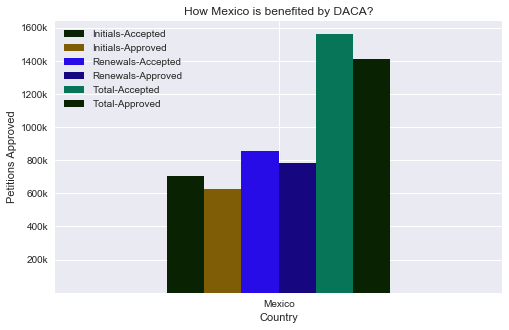

In [74]:
df = pd.read_excel('data/country-status.xls',header=1)
df.sort_values(by='Total-Approved')[-1:].plot(x='Country',kind='bar',figsize=(8,5),color=['#092202','#7F5C06','#280CE8','#16067F','#067558'])
plt.ylabel('Petitions Approved')
plt.xlabel('Country')
tick_val = [200000,400000,600000,800000,1000000,1200000,1400000,1600000]
tick_lab = ['200k','400k','600k','800k','1000k','1200k','1400k','1600k']
plt.yticks(tick_val,tick_lab)
plt.title('How Mexico is benefited by DACA?')
plt.xticks(rotation=0)
plt.show()

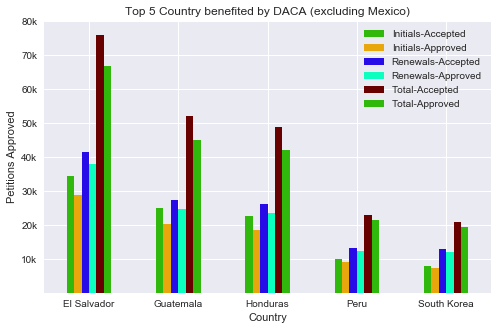

In [73]:
result = df.sort_values(by='Total-Approved')[-6:-1]
result.sort_values(by='Total-Approved',ascending=[False]).plot(x='Country',kind='bar',figsize=(8,5),color=['#31B80D','#E8A70C','#280CE8','#0DFFBF','#690000'])
plt.ylabel('Petitions Approved')
plt.xlabel('Country')
tick_val = [10000,20000,30000,40000,50000,60000,70000,80000]
tick_lab = ['10k','20k','30k','40k','50k','60k','70k','80k']
plt.yticks(tick_val,tick_lab)
plt.title('Top 5 Country benefited by DACA (excluding Mexico)')
plt.xticks(rotation=0)
plt.show()

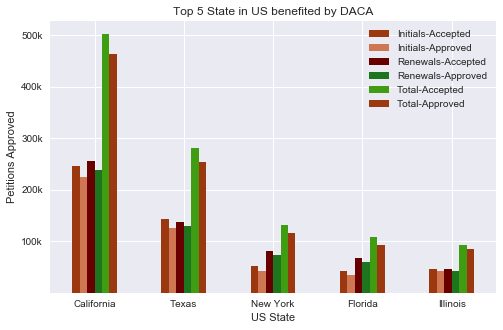

In [75]:
df = pd.read_excel('data/us-states-summary.xls',index=False,header=1)
top = (df.head(6))
df= df[df["State"] != 'Missing']
result = df.sort_values(by='Total-Approved')[-5:]
result.sort_values(by='Total-Approved',ascending=[False]).plot(x='State',kind='bar',figsize=(8,5),color=['#9C3810','#CF7753','#690000','#1D751D','#409C10'])
plt.ylabel('Petitions Approved')
plt.xlabel('US State')
plt.title('Top 5 State in US benefited by DACA')
tick_val = [100000,200000,300000,400000,500000]
tick_lab = ['100k','200k','300k','400k','500k']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.show()


One of the interesting fact in Top 5 State chart is the proximity of Mexico border with regards to California & Texas and the number of DACA recipients residing in them.

#### AVERAGE APPLICATIONS PER DAY
In 2012 on an average around 3500 applications were accepted in a day. This has dropped in subsequent years. However, renewal applications have risen from the year 2014 and when both combined, USCIS has accepted around 2000 applications per day.

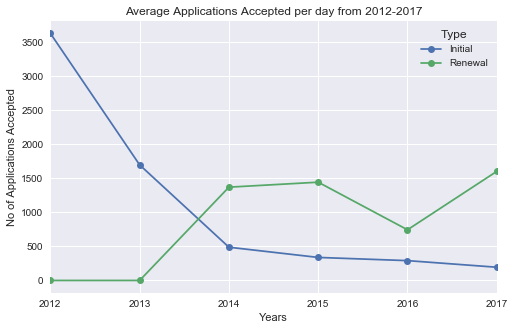

In [27]:
df = pd.read_excel('data/case-status.xls',header=1)
df_pivot = pd.pivot_table(df,values='Average',index='Year',columns='Type',fill_value=0,)
df_pivot.plot(kind='line',marker='o',figsize=(8,5))
plt.xlabel('Years')
plt.ylabel('No of Applications Accepted')
plt.title('Average Applications Accepted per day from 2012-2017')
plt.show()

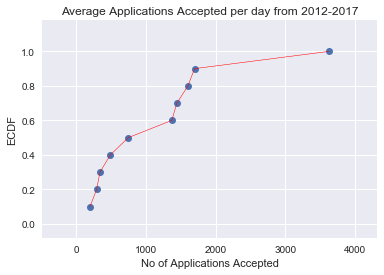

In [28]:
df = pd.read_excel('data/case-status.xls',header=1)
x = np.sort(df['Average'])
y = np.arange(1,len(x)+1)/len(x)
_ = plt.plot(x,y,marker='o',linestyle='none')
plt.ylabel('ECDF')
plt.xlabel('No of Applications Accepted')
plt.title('Average Applications Accepted per day from 2012-2017')
plt.margins(0.2)
plt.plot(x, y, color="red", linewidth=0.5, linestyle="-")
plt.show()

#### Calculate the percentile for the Average application

In [29]:
np.percentile(df['Average'],[25,50,75])

array([  375.5 ,  1057.  ,  1562.25])

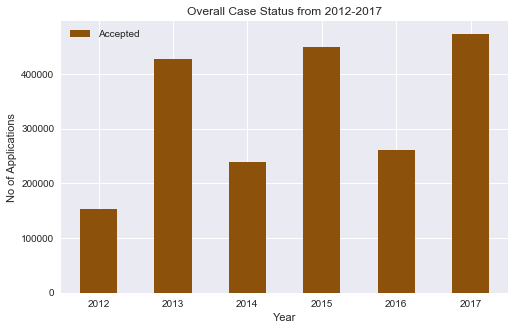

In [30]:
df = pd.read_excel('data/case-status.xls',header=1)
result_df = df.groupby('Year', as_index=False).agg({"Accepted": "sum"})
result_df.plot(x='Year',kind='bar',figsize=(8,5),color=['#8c510a','#bf812d','#dfc27d','#f6e8c3','#abd9e9','#c7eae5','#80cdc1','#35978f','#01665e'])
plt.xticks(rotation=0)
plt.ylabel('No of Applications')
plt.title('Overall Case Status from 2012-2017')
plt.show()

### 3 Applying Inferential Statistics in DACA Data
Now that we've learned the basics of inferential statistics and hypothesis testing, let's apply that to the Capstone Project

In [31]:
df_case_status = pd.read_excel('data/case-status.xls',header=1)
print(df_case_status.head())

   Year     Type  Accepted  Rejected  Received  Average  Biometrics   Review  \
0  2012  Initial    152431      5395    157826     3629    124055.0  38024.0   
1  2013  Initial    427616     16351    443967     1697    445013.0  77747.0   
2  2014  Initial    122424     19127    141551      488         NaN      NaN   
3  2014  Renewal    116476      5760    122236     1370         NaN      NaN   
4  2015  Initial     85303      7477     92780      338         NaN      NaN   

   Approved  Denied  Pending  Target  
0      1680       0   150751       1  
1    470352   10975    97040       0  
2    136101   20989    62374       1  
3     22235       0    94238       0  
4     90613   19070    37994       1  


#### Let's add couple of calculated columns like Accepted & Rejected Percentage

In [32]:
for lab, row in df_case_status.iterrows() :
    df_case_status["Accepted_Percentage"] = round(df_case_status["Accepted"]/df_case_status['Received']  * 100,1)
    df_case_status["Rejection_Percentage"] = round(df_case_status["Rejected"]/df_case_status['Received']  * 100,1)
print(df_case_status)

   Year     Type  Accepted  Rejected  Received  Average  Biometrics   Review  \
0  2012  Initial    152431      5395    157826     3629    124055.0  38024.0   
1  2013  Initial    427616     16351    443967     1697    445013.0  77747.0   
2  2014  Initial    122424     19127    141551      488         NaN      NaN   
3  2014  Renewal    116476      5760    122236     1370         NaN      NaN   
4  2015  Initial     85303      7477     92780      338         NaN      NaN   
5  2015  Renewal    363553     27997    391550     1443         NaN      NaN   
6  2016  Initial     73362      1204     74566      291         NaN      NaN   
7  2016  Renewal    187339     11113    198452      744         NaN      NaN   
8  2017  Initial     45557        42     45599      194         NaN      NaN   
9  2017  Renewal    427316     43387    470703     1602         NaN      NaN   

   Approved  Denied  Pending  Target  Accepted_Percentage  \
0      1680       0   150751       1                 96.6 

#### Accepted Percentage Trend from 2012 to 2017
After Trump became the president of United States, there was no major change in the trend on how the application was accepted.

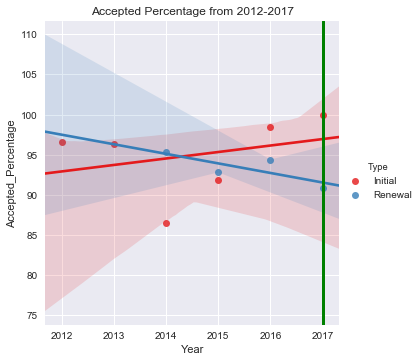

In [33]:
sns.lmplot(x='Year', y='Accepted_Percentage', data=df_case_status, hue='Type', palette='Set1')
# Display the plot
plt.title('Accepted Percentage from 2012-2017')
plt.axvline(x=2017, linewidth=3, color='green')
plt.show()

#### Examine the Mean, Std, min, max and percentile for case status from 2012-2017


In [34]:
print(round(df_case_status.describe(),2))

          Year   Accepted  Rejected   Received  Average  Biometrics    Review  \
count    10.00      10.00     10.00      10.00    10.00        2.00      2.00   
mean   2014.90  200137.70  13785.30  213923.00  1179.60   284534.00  57885.50   
std       1.66  148583.55  13508.25  159814.81  1037.55   226951.58  28088.40   
min    2012.00   45557.00     42.00   45599.00   194.00   124055.00  38024.00   
25%    2014.00   93096.25   5486.25  100144.00   375.50   204294.50  47954.75   
50%    2015.00  137427.50   9295.00  149688.50  1057.00   284534.00  57885.50   
75%    2016.00  319499.50  18433.00  343275.50  1562.25   364773.50  67816.25   
max    2017.00  427616.00  43387.00  470703.00  3629.00   445013.00  77747.00   

        Approved    Denied    Pending  Target  Accepted_Percentage  \
count      10.00     10.00      10.00   10.00                10.00   
mean   180179.00   8093.90   71883.20    0.50                94.29   
std    182112.56   7564.10   36345.94    0.53               

In [35]:
print(df_case_status.dtypes)

Year                      int64
Type                     object
Accepted                  int64
Rejected                  int64
Received                  int64
Average                   int64
Biometrics              float64
Review                  float64
Approved                  int64
Denied                    int64
Pending                   int64
Target                    int64
Accepted_Percentage     float64
Rejection_Percentage    float64
dtype: object


#### Let's explore some of the datasets we have not yet explored.
1. DACA Recipients by Country
2. DACA Recipients by US State
3. DACA Recipients by Status
4. DACA Recipients by Age
5. DACA Recipients by Sex

#### Top 4 DACA Recipients Countries (excluding Mexico) as of 2017

In [36]:
df_rec_country = pd.read_excel('data/daca_recipients_country.xls',header=1)
for lab, row in df_rec_country.iterrows() :
    df_rec_country["Country_Share"] = round(df_rec_country["Recipients"]/df_rec_country['Recipients'].sum()  * 100,1)
print(df_rec_country.head(10))

        Country  Recipients  Yrows  Xcols  Country_Share
0        Mexico      548000    1.0    1.0           79.4
1   El Salvador       25900    1.0    2.0            3.8
2     Guatemala       17700    1.0    3.0            2.6
3      Honduras       16100    1.0    4.0            2.3
4          Peru        7420    1.0    5.0            1.1
5  Korea, South        7310    2.0    1.0            1.1
6        Brazil        5780    2.0    2.0            0.8
7       Ecuador        5460    2.0    3.0            0.8
8      Colombia        5020    2.0    4.0            0.7
9     Argentina        3970    2.0    5.0            0.6


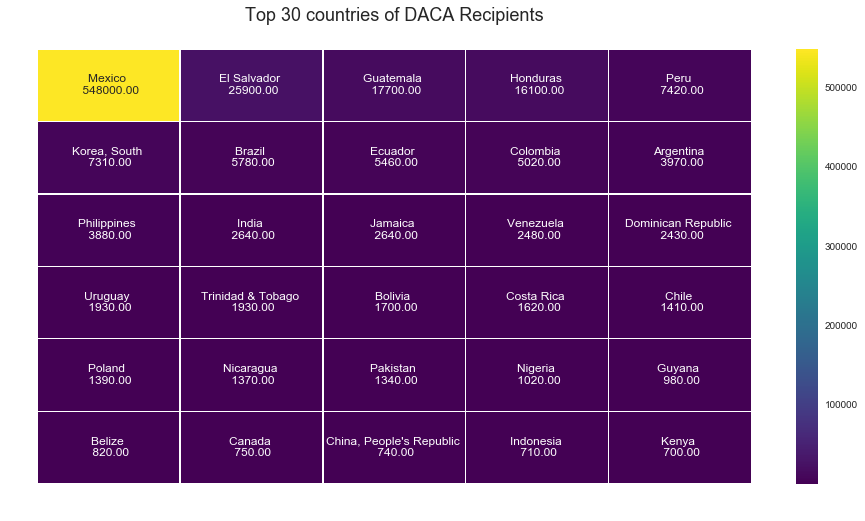

In [37]:
df_rec_country_top30 = df_rec_country.head(30)
country_name = ((np.asarray(df_rec_country_top30['Country'])).reshape(6,5))
count = ((np.asarray(df_rec_country_top30['Recipients'])).reshape(6,5))
result = df_rec_country_top30.pivot(index='Yrows',columns='Xcols',values='Recipients')
labels = (np.asarray(["{0} \n {1:.2f}".format(symb,value)
                      for symb,value in zip(country_name.flatten(),
                                            count.flatten())])
         ).reshape(6,5)
fig,ax = plt.subplots(figsize=(16,8))
title = 'Top 30 countries of DACA Recipients'
plt.title(title,fontsize = 18)
ttl= ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sns.heatmap(result,annot=labels,fmt="",cmap='viridis',linewidths=0.30,ax=ax)
plt.show()

#### Top 30 DACA Recipients US State as of 2017

In [38]:
df_rec_state = pd.read_excel('data/daca_recipients_state.xls',header=1)
for lab, row in df_rec_state.iterrows() :
    df_rec_state["State_Share"] = round(df_rec_state["Recipients"]/df_rec_state['Recipients'].sum()  * 100,1)
print(df_rec_state.head(10))

            State  Recipients  Yrows  Xcols  State_Share
0      California      197900    1.0    1.0         28.7
1           Texas      113000    1.0    2.0         16.4
2        Illinois       35600    1.0    3.0          5.2
3        New York       32900    1.0    4.0          4.8
4         Florida       27000    1.0    5.0          3.9
5         Arizona       25500    2.0    1.0          3.7
6  North Carolina       25100    2.0    2.0          3.6
7         Georgia       21600    2.0    3.0          3.1
8      New Jersey       17400    2.0    4.0          2.5
9      Washington       16300    2.0    5.0          2.4


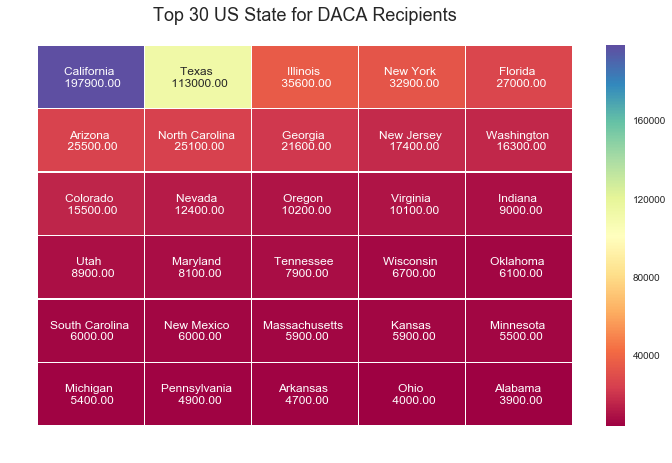

In [39]:
df_rec_state_top30 = df_rec_state.head(30)
symbol = ((np.asarray(df_rec_state_top30['State'])).reshape(6,5))
percentage = ((np.asarray(df_rec_state_top30['Recipients'])).reshape(6,5))
result = df_rec_state_top30.pivot(index='Yrows',columns='Xcols',values='Recipients')
labels = (np.asarray(["{0} \n {1:.2f}".format(symb,value)
                      for symb,value in zip(symbol.flatten(),
                                            percentage.flatten())])
         ).reshape(6,5)
fig,ax = plt.subplots(figsize=(12,7))
title = 'Top 30 US State for DACA Recipients'
plt.title(title,fontsize = 18)
ttl= ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sns.heatmap(result,annot=labels,fmt="",cmap='Spectral',linewidths=0.30,ax=ax)
plt.show()


#### Sex Ratio of DACA Recipients as of 2017

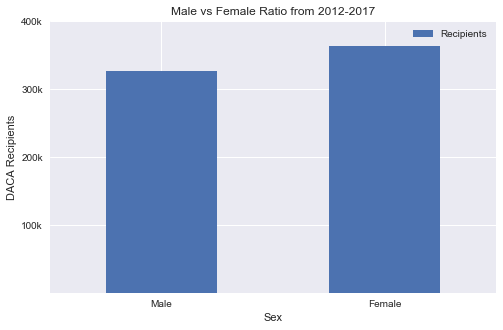

In [40]:
df_rec_sex = pd.read_excel('data/daca_sex_ratio.xls',header=1)
df_rec_sex_top5 = df_rec_sex.head(2)
sns.set()
df_rec_sex_top5.sort_values(by='Recipients')[-5:].plot(x='Sex',kind='bar',figsize=(8,5))
plt.xlabel('Sex')
plt.ylabel('DACA Recipients')
plt.title('Male vs Female Ratio from 2012-2017')
tick_val = [100000,200000,300000,400000]
tick_lab = ['100k','200k','300k','400k']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.show()

#### Age range of DACA Recipients as of 2017


##### The age range of Under 16 had around 2k recipients which was too lower . So I had to remove that from the chart to demonstrate how the recipients have been distributed. 

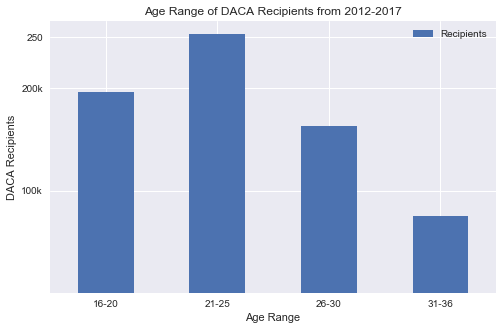

In [41]:
df_rec_age = pd.read_excel('data/daca_recipients_age.xls',header=1)
df_rec_age_top5 = df_rec_age.head(5)
df_rec_age_top5= df_rec_age_top5[df_rec_age_top5["Age"] != 'Under 16']
sns.set()
df_rec_age_top5.plot(x='Age',kind='bar',figsize=(8,5))
plt.xlabel('Age Range')
plt.ylabel('DACA Recipients')
plt.title('Age Range of DACA Recipients from 2012-2017')
tick_val = [100000,200000,250000]
tick_lab = ['100k','200k','250']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.show()

#### Maritial Status of DACA Recipients as of 2017


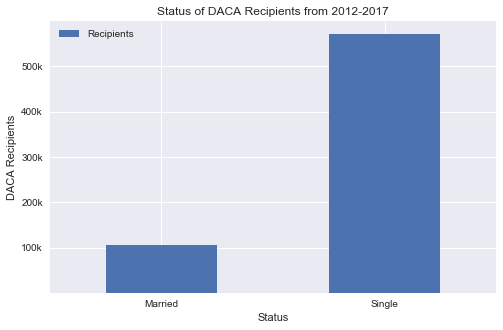

In [42]:
df_rec_status = pd.read_excel('data/daca_recipients_status.xls',header=1)
df_rec_status_top5 = df_rec_status.head(2)
sns.set()
df_rec_status_top5.sort_values(by='Recipients')[-5:].plot(x='Status',kind='bar',figsize=(8,5))
plt.xlabel('Status')
plt.ylabel('DACA Recipients')
plt.title('Status of DACA Recipients from 2012-2017')
tick_val = [100000,200000,300000,400000,500000]
tick_lab = ['100k','200k','300k','400k','500k']
plt.yticks(tick_val,tick_lab)
plt.xticks(rotation=0)
plt.show()

### It is interesting to note people with Single status are almost 75% of the total recipients.

#### Calculate the number of countries benefited by DACA and their average mean

In [43]:
# Remove all null from DACA country recipients
df_rec_country_all = pd.read_excel('data/daca_recipients_country.xls',header=1)
clean_df_rec_country_all = df_rec_country_all[np.logical_not(df_rec_country_all['Recipients'].isnull())]
print('Number of countries: {}'.format(len(clean_df_rec_country_all)))
print('Mean excess DACA Recipient ratio: {:.4f}'.format(clean_df_rec_country_all['Recipients'].mean()))

Number of countries: 151
Mean excess DACA Recipient ratio: 4570.3974


#### Let's divide the countries benefitted by DACA into two groups and calculate their mean
1. Less than 1000 recipients
2. More than 1000 recipients

In [44]:

df_less_1000 = clean_df_rec_country_all[(clean_df_rec_country_all['Recipients'] < 1000) & (clean_df_rec_country_all['Recipients'] > 0)]
print('Number of countries with < 1000 DACA Recipients: {}'.format(len(df_less_1000)))
print('Mean excess Recipients rate: {:.3f}'.format(df_less_1000['Recipients'].mean()))


df_great_1000 = clean_df_rec_country_all[clean_df_rec_country_all['Recipients'] > 10000]
print('\nNumber of countries with > 1000 DACA Recipients: {}'.format(len(df_great_1000)))
print('Mean excess Recipients rate: {:.3f}'.format(df_great_1000['Recipients'].mean()))


Number of countries with < 1000 DACA Recipients: 126
Mean excess Recipients rate: 141.984

Number of countries with > 1000 DACA Recipients: 4
Mean excess Recipients rate: 151925.000


#### Compute and report the observed significance value (or p-value).

In [45]:
two_sample = stats.ttest_ind(df_less_1000['Recipients'], 
                          df_great_1000['Recipients'])
cm = sms.CompareMeans(sms.DescrStatsW(df_less_1000['Recipients']), 
                      sms.DescrStatsW(df_great_1000['Recipients']))

print('The 99% confidence interval about the mean difference is ({:.3f}, {:.3f}).'.format(cm.tconfint_diff(alpha = 0.01, usevar='unequal')[0],
                                                                                          cm.tconfint_diff(alpha = 0.01, usevar='unequal')[1]))
print('The t-statistic is %.3f and the p-value is %.8f.' % two_sample)

The 99% confidence interval about the mean difference is (-923030.943, 619464.912).
The t-statistic is -7.392 and the p-value is 0.00000000.


#### Plot a histogram for group less than 1000 recipients.


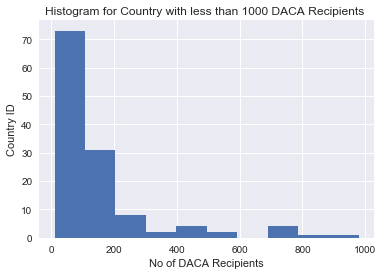

In [46]:
plt.hist(df_less_1000['Recipients'])
plt.xlabel('No of DACA Recipients')
plt.ylabel('Country ID')
plt.title('Histogram for Country with less than 1000 DACA Recipients ')
plt.show()

In the above figure, we clearly notice that the distribution is not a normal one.It is a left skewed plot.

In [47]:
df_sum = df_less_1000['Recipients'].sum()
for lab, row in df_less_1000.iterrows() :
    df_less_1000["Country_Share"] = round(df_less_1000["Recipients"]/df_sum  * 100,1)
print(df_less_1000.head(10))

/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                     Country  Recipients  Yrows  Xcols  Country_Share
24                    Guyana         980    5.0    5.0            5.5
25                    Belize         820    6.0    1.0            4.6
26                    Canada         750    6.0    2.0            4.2
27  China, People's Republic         740    6.0    3.0            4.1
28                 Indonesia         710    6.0    4.0            4.0
29                     Kenya         700    6.0    5.0            3.9
30                  Portugal         520    7.0    1.0            2.9
31            United Kingdom         500    7.0    2.0            2.8
32                Bangladesh         490    7.0    3.0            2.7
33                     Ghana         490    7.0    4.0            2.7


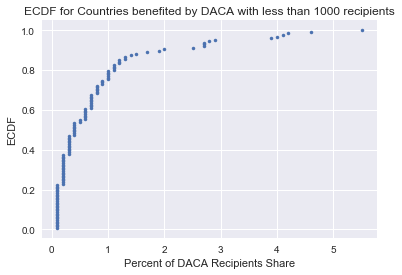

In [48]:
x= np.sort(df_less_1000['Country_Share'])
y = np.arange(1,len(x) + 1)/len(x)
_ = plt.plot(x,y,marker='.',linestyle='none')
_ = plt.title('ECDF for Countries benefited by DACA with less than 1000 recipients')
_ = plt.xlabel('Percent of DACA Recipients Share')
_ = plt.ylabel('ECDF')
plt.margins(0.05)

#### Calculate the median for the two groups (Less than 1000 and greater than 1000)

In [49]:
df_lt = df_less_1000.loc[:, 'Country':'Recipients']
print(df_lt.head(10))

                     Country  Recipients
24                    Guyana         980
25                    Belize         820
26                    Canada         750
27  China, People's Republic         740
28                 Indonesia         710
29                     Kenya         700
30                  Portugal         520
31            United Kingdom         500
32                Bangladesh         490
33                     Ghana         490


#### Calculate the percentile for both groups

In [50]:
lt_per_25 = df_less_1000.Recipients.quantile(0.25)
lt_per_50 = df_less_1000.Recipients.quantile(0.50)
lt_per_75 = df_less_1000.Recipients.quantile(0.75)
gt_per_25 = df_great_1000.Recipients.quantile(0.25)
gt_per_50 = df_great_1000.Recipients.quantile(0.50)
gt_per_75 = df_great_1000.Recipients.quantile(0.75)
print('25 percentile for countries having less than 1000 DACA Recipients ',lt_per_25)
print('50 percentile for countries having less than 1000 DACA Recipients ',lt_per_50)
print('75 percentile for countries having less than 1000 DACA Recipients ',lt_per_75)
print('25 percentile for countries having greater than 1000 DACA Recipients ',gt_per_25)
print('50 percentile for countries having greater than 1000 DACA Recipients ',gt_per_50)
print('75 percentile for countries having greater than 1000 DACA Recipients ',gt_per_75)


25 percentile for countries having less than 1000 DACA Recipients  30.0
50 percentile for countries having less than 1000 DACA Recipients  75.0
75 percentile for countries having less than 1000 DACA Recipients  167.5
25 percentile for countries having greater than 1000 DACA Recipients  17300.0
50 percentile for countries having greater than 1000 DACA Recipients  21800.0
75 percentile for countries having greater than 1000 DACA Recipients  156425.0


## Predicting Approvals on the DACA Sample Set from Q4 2017
We will build a logistic regression classifier to predict approval for the DACA cases. 

My model will used independent variables sex and age to predict the dependent variable approved.

In [51]:
#reading the data from disk into memory
dfq4_summary =  pd.read_excel('data/2017_Q4_Cases.xls',header=1)
print(dfq4_summary.head())

     ID  Age     Sex   Status  Result
0  1000   36    Male  Married       0
1  1001   21  Female   Single       1
2  1002   20    Male   Single       0
3  1003   25    Male   Single       1
4  1004   22  Female   Single       1


In [52]:
#print all the column names
dfq4_summary.columns

Index(['ID', 'Age', 'Sex', 'Status', 'Result'], dtype='object')

In [53]:
#Create a new dataframe and put only three variable
X = pd.DataFrame()
X['sex'] = dfq4_summary['Sex']
X['age'] = dfq4_summary['Age']
X['approved'] = dfq4_summary['Result']

In [54]:
#approved will be my dependent variable, So i will remove it from my X and add it in my Y
y = X['approved'] 
X = X.drop(['approved'],axis = 1)

In [55]:
#We need to handle sex such that it is categorical for logical regression. Currently it is a string. 
# We can use pandas to get dummies to implement one hot encoding 
pd.get_dummies(X.sex)


,Female,Male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
5,0,1
6,1,0
7,1,0
8,0,1
9,1,0


In [56]:
#get dummies return an indicator variable for each category. 
#So it's important to drop one category otherwise there will be two perfectly collinear variables

#Here, since i have only two variables it's easy. I'll take one and assign it to sex
# So now sex becomes female = 1, male = 0
X['sex'] = pd.get_dummies(X.sex)['Female']

In [57]:
#To scale our features as with linear regression
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [58]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

### Model Creation

At this point I have a test and train set defined. I will use it to train my model and test to see how accurate the model is. 

There is one problem with that approach though. Let's say my model is right 70% of the time. Is that good? 
I am going to build a single "base rate" model to compare my logistic model, so that we can see our logic model is useful or not. 

Then i will build my logistic model. 

### Base Rate Model

For my base rate model, I am going to predict that all application gets denied

In [59]:
#This function looks for females in the test set and returns 1, approved otherwise it returns 0
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y


In [60]:
#how accurate is my base rate model?
y_base_rate = base_rate_model(X_test)
print("Base rate accuracy is %2.2f" % accuracy_score(y_test,y_base_rate))

Base rate accuracy is 0.27


So our base model is 27%, let's see if our logistic model can beat it. As a rule of thumb I used the L2 Lasso and regularization as 1. 

In [61]:
model = LogisticRegression(penalty = 'l2',C=1)

In [62]:
model.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
print("Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test)) )

Logistic accuracy is 0.77


### Model Comparison
Our base model wasn't very good. But it looked better than it was bacause of class inbalance. 

A better metric for binary classifier comparison is AUC or Area under Curve. Closely related is precision and recall.

Precision is the fraction of correctly identified examples of a class(ratio of true positives to all positives)
Recall is the fraction of observations classified in that class that was correctly classified.

In [64]:
print ("....Base Model....")
#base rate AUC
base_roc_aoc = roc_auc_score(y_test,base_rate_model(X_test))
print("Base rate AUC = %2.2f" % base_roc_aoc)
print(classification_report(y_test,base_rate_model(X_test)))
print ("\n\n....Logistic Model....")
#Calculate Logistic  AUC
logistic_roc_aoc = roc_auc_score(y_test,model.predict(X_test))
print("Logistic rate AUC = %2.2f" % logistic_roc_aoc)
print(classification_report(y_test,model.predict(X_test)))

....Base Model....
Base rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.27      1.00      0.43         6
          1       0.00      0.00      0.00        16

avg / total       0.07      0.27      0.12        22



....Logistic Model....
Logistic rate AUC = 0.69
             precision    recall  f1-score   support

          0       0.60      0.50      0.55         6
          1       0.82      0.88      0.85        16

avg / total       0.76      0.77      0.77        22



/Users/sunilayyappan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


So Base model which is all application gets denied is only 0.5 which is actually the lowest AUC you can possibly get. This model is no better than random.

Then in the logistic model, the AOC is 0.69 which is pretty comparable to its accuracy metrics. So here it is very clear that the logistic model is far superior to the base rate model. It is because, the AUC doesn't suffer from the class and balance problem. Infact we can see that in the base model we predicted none of the applications will get approved and there were 16 of them. So it was not good in class 1 which was approved. We managed to predict all of the applications that get approved however the precision was pretty low at 27%. So 27% of the time, we were able to predict that the applications got approved. 

If we examine the logistic model, we can see that now where we were much more precise in predicting the applications that were approved however our recall were dropped. But our precision on people that got their application approved were 82% and 88% we correctly predicted it.

In [65]:
fpr, tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

#### Forming the Confusion Matrix

In [66]:
confusion_matrix(y_test,model.predict(X_test))

array([[ 3,  3],
       [ 2, 14]])

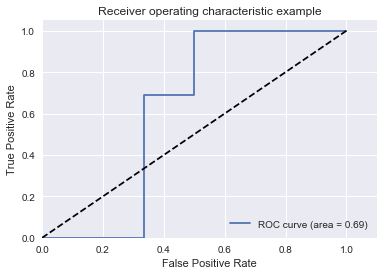

In [67]:
#Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % logistic_roc_aoc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

The perfect model is hundred percent true positive and zero percent false positive. Here in this case we can see that around 0.69 in True Positive Rate is the our model. 

### 4.Conclusion

So DACA has been a huge relief for almost a million people who have left the country between 1982-2001. From the year 2012, every second year these recipients have been applying for an extension and continue to stay legally in the United States. 

On one side when there is a debate happening on H1-B who have entered their country legally and finding it difficult to keep their status intact and on the other side, DACA has helped almost million people to stay in this country legally. 

From 2012-2017 around 2000 DACA recipients had their status terminated due to involvement in criminal and gang activity which is like 0.0025% of the total recipients benefited by DACA.

As a Data scientist, you get intrigued by different information and the numbers and try to get an unbiased story out of it. But in this case, it's a human life and how their lives are going to be impacted when all this ends in March 2018. 